### Fetch Rewards Coding Exercise - Data Analyst 
#### By Indira Neela

### First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

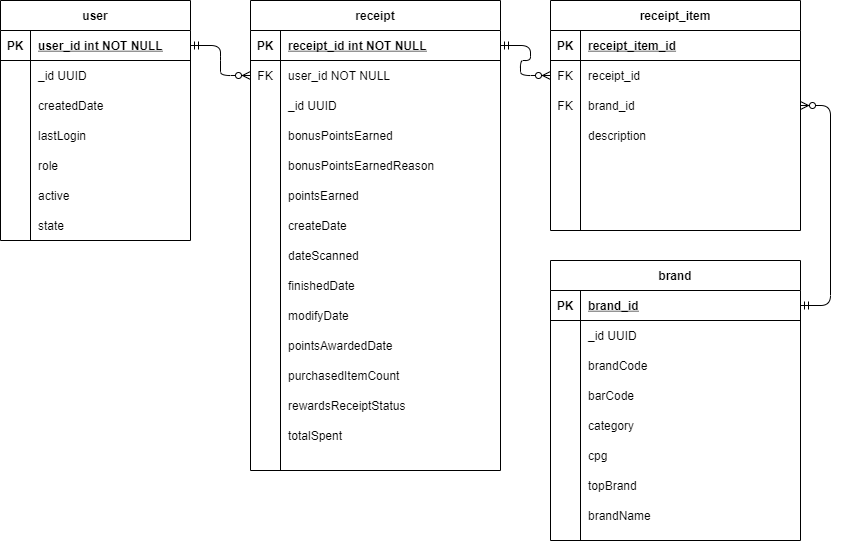

##### Tables:
1. **User table:** Holds all the users information with each row representing a single user
1. **Receipt table:** Contains the information related to a receipt with all the receipt items stored in receipt_item table
1. **Receipt_item table:** Holds the information of a receipt item with receipt_id as a FK to receipt table, and brand_id as a FK to the brand table
1. **Brand table:** This table hodls the information related to brands and their items.


I only displayed the fields that are relevant to the question below to be concise.


##### Assumptions: 
1. Brand table is expected to contain the information of all the brands and items. This informartion may be sourced from a third party or from the brands directly.
1. A brand can have multiple items, with barcode specific to each item within the brand.
 

### Second: Write a query that directly answers a predetermined question from a business stakeholder

###### Which brand has the most transactions among users who were created within the past 6 months?

```
SELECT b.brandCode AS brandName, count(1) AS num_transactions 
    FROM receipt r JOIN receipt_item ri ON r.receipt_id = ri.receipt_id
    JOIN brand b ON b.brand_id = ri.brand_id 
    WHERE r.user_id IN 
        (SELECT user_id FROM user
            WHERE createdDate >= DATE_ADD(now(), INTERVAL -6 MONTH)
        ) 
    GROUP BY brandName ORDER BY num_transactions DESC LIMIT 1;
```


NOTE: This query assumes there is only one top brand, if there are multiple brands with the same number of transactions we can retrieve all of them by removing the "LIMIT 1" clause

### Third: Evaluate Data Quality Issues in the Data Provided

In [1]:
import pandas as pd 
import numpy as np
import gzip
import shutil
import os

In [2]:
for i in os.listdir():
    if 'json' in i:
        with gzip.open(i, 'rb') as f_in:
            with open(i.replace('.gz',''), 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

In [3]:
#loading the brands.json data into pandas data frame

In [4]:
brands = pd.read_json(r"C:\Users\indu2\Desktop\Assesment\brands.json", lines= True)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [5]:
#loading the users.json data into pandas data frame

In [6]:
users = pd.read_json('users.json', lines= True)
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [7]:
#loading the receipts.json data into pandas data frame

In [8]:
receipts = pd.read_json('receipts.json', lines= True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [9]:
#finding percentage of rows with null values per field in all the json files

In [10]:
print("Percentage of rows with null values by fields in users.json:")
users.isnull().sum()*100/len(users)

Percentage of rows with null values by fields in users.json:


_id              0.000000
active           0.000000
createdDate      0.000000
lastLogin       12.525253
role             0.000000
signUpSource     9.696970
state           11.313131
dtype: float64

In [11]:
print("Percentage of rows with null values by fields in brands.json:")
brands.isnull().sum()*100/len(brands)

Percentage of rows with null values by fields in brands.json:


_id              0.000000
barcode          0.000000
category        13.281919
categoryCode    55.698372
cpg              0.000000
name             0.000000
topBrand        52.442159
brandCode       20.051414
dtype: float64

In [12]:
print("Percentage of rows with null values by fields in receipts.json:")
receipts.isnull().sum()*100/len(receipts)

Percentage of rows with null values by fields in receipts.json:


_id                         0.000000
bonusPointsEarned          51.385165
bonusPointsEarnedReason    51.385165
createDate                  0.000000
dateScanned                 0.000000
finishedDate               49.240393
modifyDate                  0.000000
pointsAwardedDate          52.010724
pointsEarned               45.576408
purchaseDate               40.035746
purchasedItemCount         43.252904
rewardsReceiptItemList     39.320822
rewardsReceiptStatus        0.000000
totalSpent                 38.873995
userId                      0.000000
dtype: float64

In [13]:
# List of all brands in Receipt items
receipt_item_brands =set()
import math

for i in range(len(receipts)):
    if isinstance(receipts.iloc[i]['rewardsReceiptItemList'],list):
        tempArr=  receipts.iloc[i]['rewardsReceiptItemList']
        for j in range(len(tempArr)):
            if 'brandCode' in tempArr[j]:
                receipt_item_brands.add(tempArr[j]['brandCode'].strip())
print(list(receipt_item_brands))

['WISHBONE', 'DANNON', 'OSCAR MAYER', 'RENUZIT', "BRASWELL'S", 'THAI KITCHEN', 'TACO BELL', 'KRAFT', 'CREST 3D WHITE', 'COKE', 'JUST CRACK AN EGG', 'VITAL FARMS ALFRESCO EGGS', 'ORE-IDA', 'CADBURY', 'TEMPTATIONS', 'KRAFT EASY CHEESE', 'PRIVATE SELECTION', "HEMPLER'S", 'MORTON', 'PEARLS', 'SABRA', 'DIET COKE', 'EDWARDS', 'JELLY BELLY', 'LUNDBERG FAMILY FARMS', "FRENCH'S", 'CAL-ORGANIC FARMS', 'TYSON', 'DIGIORNO', 'CRACKER BARREL', 'PHILADELPHIA', 'ORBIT', 'SPARKLING ICE', 'JENNIE-O', 'PLAYTEX', 'C&H', '7UP', 'THOMAS ENGLISH MUFFINS', 'CINNAMON TOAST CRUNCH', 'SPECIAL K', 'EGGO', "EGGLAND'S BEST", "STOUFFER'S CLASSICS", 'PILLSBURY', 'DELI', 'MCCORMICK', 'COOL WHIP', "KELLOGG'S", 'KEMPS', 'SKITTLES', 'FAGE', 'SIMPLE TRUTH', 'SMITHFIELD', 'CRISPIX', 'LA BANDERITA', 'KRAZY GLUE', 'TAYLOR FARMS', "HERSHEY'S KISSES", 'JELL-O', "WELCH'S", 'FRESH STEP', 'HILLSHIRE FARM', 'ADVIL', 'CHEETOS', 'KETTLE BRAND', 'CHEX', 'STARKIST', 'RAGU', 'POMPEIAN', 'NATURE VALLEY', 'EL MONTEREY', "BOAR'S HEAD", 'K

In [14]:
# List of all brand codes in brands.json
brand_names = set(brands['brandCode'].unique().flatten())
print(brand_names)

{nan, '', 'TEST BRANDCODE @1606765578747', 'F WHITLOCK AND SONS', '511111905479', 'TACO BELL', 'TEST BRANDCODE @1598639199674', 'KRAFT', 'TEST BRANDCODE @1598711015578', 'COUNTRY TIME', 'TEST BRANDCODE @1610496646232', 'BOLTHOUSE FARMS', 'JUST CRACK AN EGG', "BAKER'S", 'AIR WICK', 'POP SECRET', 'MERMAID CEREAL', 'ALEVE DIRECT THERAPY PAIN RELIEF DEVICES', 'WOOLITE', 'TEST BRANDCODE @1595531348374', 'CHOCOLATE LUCKY CHARMS', 'TEST BRANDCODE @1610038521624', '511111805342', 'JEFFERSON’S RESERVE', 'AVION', 'WHEATIES', '511111005148', 'BADEDAS', 'TEST BRANDCODE @1607312532874', 'NEAR EAST', 'TEST BRANDCODE @1610135035332', 'CLOROX', 'APOTHECARE ESSENTIALS', 'CAMPBELLS CHUNKY ', 'TEST BRANDCODE @1598290603618', 'TEST BRANDCODE @1610660035741', 'SAINT ARCHER', 'TEST BRANDCODE @1609794603283', 'SIMILAC', 'PULLUPS', '511111805298', 'TEST BRANDCODE @1595968943049', ' MILANO', 'TEST BRANDCODE @1601939013649', 'TEST BRANDCODE @1610660035788', 'TEST BRANDCODE @1612366146091', 'TEST BRANDCODE @1598

In [15]:
# brands that are present in receipt_items but not in brands
receipt_item_brands_not_in_brands = receipt_item_brands - brand_names
print(receipt_item_brands_not_in_brands)

{'WISHBONE', "BRASWELL'S", 'DANNON', 'RENUZIT', 'THAI KITCHEN', 'CREST 3D WHITE', 'COKE', 'VITAL FARMS ALFRESCO EGGS', 'DIET COKE', 'KRAFT EASY CHEESE', 'CADBURY', 'TEMPTATIONS', 'SABRA', 'PEARLS', 'EDWARDS', 'PRIVATE SELECTION', "HEMPLER'S", 'MORTON', 'JELLY BELLY', 'LUNDBERG FAMILY FARMS', "FRENCH'S", 'CAL-ORGANIC FARMS', 'TYSON', 'DIGIORNO', 'ORBIT', 'SPARKLING ICE', 'JENNIE-O', 'PLAYTEX', 'C&H', '7UP', 'THOMAS ENGLISH MUFFINS', 'CINNAMON TOAST CRUNCH', 'SPECIAL K', 'EGGO', "EGGLAND'S BEST", "STOUFFER'S CLASSICS", 'PILLSBURY', 'DELI', 'MCCORMICK', "KELLOGG'S", 'KEMPS', 'SKITTLES', 'FAGE', 'SIMPLE TRUTH', 'SMITHFIELD', 'CRISPIX', 'LA BANDERITA', 'KRAZY GLUE', 'TAYLOR FARMS', "HERSHEY'S KISSES", "WELCH'S", 'FRESH STEP', 'HILLSHIRE FARM', 'ADVIL', 'CHEX', 'STARKIST', 'RAGU', 'POMPEIAN', 'EL MONTEREY', "BOAR'S HEAD", 'KARO', 'BRAND', 'GALLO FAMILY VINEYARDS', 'SIMPLE TRUTH ORGANIC', 'OLD EL PASO', "JACK DANIEL'S READY TO EAT", 'MISSION', 'ORGANIC ROOT STIMULATOR', 'KERR', 'THOMAS', 'BEN

In [16]:
# common brands across receipt_items and brands
print(receipt_item_brands.intersection(brand_names))

{'VIVA', 'STOVE TOP', 'PACIFIC FOODS', 'SWANSON', 'OSCAR MAYER', 'PEPSI', 'FINISH', 'TACO BELL', 'KRAFT', 'NATURE VALLEY', 'ARNOLD', 'JUST CRACK AN EGG', 'ORE-IDA', 'QUAKER', 'V8', 'HUGGIES', 'KNORR', 'SARGENTO', 'GREY POUPON', 'CRACKER BARREL', 'PHILADELPHIA', 'RICE-A-RONI', 'DORITOS', 'KLONDIKE', 'PLANTERS', 'MOUNTAIN DEW', 'COTTONELLE', 'COOL WHIP', 'LUNCHABLES', 'PREGO', "HELLMANN'S/BEST FOODS", 'PEPPERIDGE FARM', 'VELVEETA', 'JELL-O', 'DOLE CHILLED FRUIT JUICES', 'CLASSICO', 'TOSTITOS', 'KLEENEX', 'CHEETOS', 'KETTLE BRAND', 'YUBAN'}


##### Data Quality Issue 1:
###### Analyzing brands.json

1. A lot of brands and their items are missing from brands.json, this will lead to incorrect results for queries that deal with transcations about brands.
1. Brands.json has multiple entries with brandCodes including the text "TEST BRANDCODE @", while this may be the case with  this json being a test dataset, we need to ensure that the production dataset is clean from such test data. 

**Business Impact:**  Having more accurate brand data will help fetchrewards devise better marketing campaigns to analyse and improve the sales and revenue of brands that partner with our business. 

##### Data Quality Issue 2:
###### Analyzing users.json

In [17]:
from collections import Counter
userIdList = []
users_id = [i for i in users['_id']]
for i in range(len(users_id)):
    singleRow = users_id[i]
    for key,value in singleRow.items():
        userIdList.append(value)

duplicate_users = dict(filter(lambda u: u[1]>1,Counter(userIdList).items()))
print("Duplicates: ", len(duplicate_users))
duplicate_users

Duplicates:  70


{'5ff1e194b6a9d73a3a9f1052': 11,
 '5ff1e1eacfcf6c399c274ae6': 4,
 '5ff370c562fde912123a5e0e': 5,
 '5ff36d0362fde912123a5535': 3,
 '5ff36be7135e7011bcb856d3': 3,
 '5ff36a3862fde912123a4460': 5,
 '5ff4ce33c3d63511e2a484b6': 7,
 '5ff47392c3d63511e2a47881': 5,
 '5ff4ce3dc3d63511e2a484dc': 4,
 '5ff5d15aeb7c7d12096d91a2': 18,
 '5ff7264e8f142f11dd189504': 4,
 '5ff73b90eb7c7d31ca8a452b': 2,
 '5ff7930fb3348b11c93372a6': 3,
 '5ff7268eeb7c7d12096da2a9': 2,
 '5ff8ce8504929111f6e913cb': 3,
 '5ff873d1b3348b11c9337716': 5,
 '5ff8da28b3348b11c9337ac6': 2,
 '5ff873ddb3348b11c9337733': 2,
 '5ffcb47d04929111f6e9256c': 2,
 '5ffc8ff9b3348b11c9338896': 4,
 '5ffc8f9704929111f6e922bf': 6,
 '5ffcb4bc04929111f6e92608': 2,
 '5ffc9d87b3348b11c9338920': 3,
 '5fff0f4fb3348b03eb45abb0': 4,
 '5fff4beedf9ace121f0c17ea': 2,
 '5ffe115404929101d0aaebb2': 2,
 '5fff55dabd4dff11dda8f5f1': 7,
 '600056a3f7e5b011fce897b0': 8,
 '6000d46cfb296c121a81b20c': 2,
 '6000b7aefb296c121a8198b1': 3,
 '60005709bd4dff11dda90ac1': 2,
 '6000

From the result above, there are duplicate entries in users.json for 70 users. If users.json is considered as the source of user data, having such duplicates will lead to issues during runtime for ex. during user authentication, updating user properties/status etc.

### Fourth: Communicate with Stakeholders

Hi Team,

I am Indira Neela, a data analyst working on FetchRewards datasets for Users, Receipts, and Brands to generate business insights to help improve the customer experience and drive sales for our partner brands. During the analysis, I have noticed a few shortcomings in the dataset that could cause incorrect business reports. Could you please review the following questions, 

1. May I know if this is a test dataset or a production dataset? This will help me design a more normalized schema to optimize the data analysis queries. 
1. There are a few entries in receipt items that have the description as "ITEM NOT FOUND", may I know the source of brands.json so that I can reach out to the concerned teams to enrich our brands.json with more accurate data for such items. 
1. Do we have any mechanisms to identify and enrich missing or duplicated data in our systems that lead to a better customer experience for the users of our service?

In addition to the above, to model a normalized relational DB schema for the systems that store this data, I have analyzed receipts and brands data to correlate the entries with each other. During the analysis, I noticed that there are a few brands in receipts data that are missing in the brands data. Are the entries in brands.json with Test brand names valid and to be accounted for generating business reports? And, how do I enrich the data in brands.json for the items that are missing, when compared to the items from receipts data?

As this is unstructured data, I have run some queries to find out which data need to be scrubbed and found that the users.json has duplicate entries for the same user. Is the dataset expected to have multiple entries for the same user in users.json, if yes, is it okay to aggregate the corresponding receipt data across all the entries? Additionally, all three datasets have some fields that are null, for example, 38.8% of receipts are missing "totalSpent" field, which would lead to incorrect sales revenue across users and brands.

We can take a few measures to further optimize the performance of our systems and avoid scaling issues in the future, one such measure is to translate the alphanumeric identifiers in the dataset to numeric identifiers, which will reduce the size of database indexes and improve read-write performance for the database. Decreasing the duplicates and handling the missing values will also lead to more accurate reports.

Please let me know the convenient time to further discuss these issues and proposed solutions, to deliver a better experience for our customers and partner brands.

Regards,

Indira Neela